# Principal Component Analysis with Cancer Data

In [78]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.api.types import is_numeric_dtype

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [79]:
#loading the dataset
candf = pd.read_csv('breast-cancer-wisconsin-data.csv')

In [80]:
#reading the first 10 records
candf.head(10)
# Id columns is to identify rows hence can be skipped in analysis
# All columns have numerical values
# Class would be the target variable. Should be removed when PCA is done

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [299]:
#shape of the dataset
candf.shape

(699, 9)

In [300]:
#types of the dataset
candf.dtypes
## all the columns are numerical except bare nuclei which is object

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
dtype: object

In [302]:
#descriptive analysis
candf.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


This data consists of 11 features. Min ,max, 25% ,50%,75% of data are found along with mean median and std. All the features are normally distributed as mean is greater than median. 

In [84]:
candf.groupby(['Class']).count()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,,,,,,,,,,
2,458,458,458,458,458,458,458,458,458,458
4,241,241,241,241,241,241,241,241,241,241


We could find that there are two kind of classification. The class 2 has 458 records and class 4 has 241 records

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [85]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
candf.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

From this we can find that there are no missing values in the data

In [86]:
candf['ClumpThickness'].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9], dtype=int64)

In [87]:
candf['Cell Size'].unique()

array([ 1,  4,  8, 10,  2,  3,  7,  5,  6,  9], dtype=int64)

In [88]:
candf['Cell Shape'].unique()

array([ 1,  4,  8, 10,  2,  3,  5,  6,  7,  9], dtype=int64)

In [89]:
candf['Marginal Adhesion'].unique()

array([ 1,  5,  3,  8, 10,  4,  6,  2,  9,  7], dtype=int64)

In [90]:
candf['Single Epithelial Cell Size'].unique()

array([ 2,  7,  3,  1,  6,  4,  5,  8, 10,  9], dtype=int64)

In [91]:
candf['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [92]:
candf['Normal Nucleoli'].unique()

array([ 3,  9,  1,  2,  4,  5,  7,  8,  6, 10], dtype=int64)

In [93]:
candf['Bland Chromatin'].unique()

array([ 1,  2,  7,  4,  5,  3, 10,  6,  9,  8], dtype=int64)

In [94]:
candf['Mitoses'].unique()

array([ 1,  5,  4,  2,  3,  7, 10,  8,  6], dtype=int64)

From the above we could find that Bare Nuclei has missing values which should be replaced with meaningful values

In [95]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
len(candf[candf['Bare Nuclei'] == '?'])


16

In [96]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
candf['Bare Nuclei'].mode()
#most occuring data for BAre Nuclei column is 1

0    1
dtype: object

1 is the most occuring value of the dataframe. So we are replacing mode with the missing values.

In [97]:
candf['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [98]:
#fillnullvalues = candf['Bare Nuclei'][0]
candf['Bare Nuclei'].replace({'?': candf.describe(include='all')['Bare Nuclei']['top']}, inplace=True)


In [99]:
#verifying unique column after replacing it will mode
candf['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [100]:
#verifying shape of data after replacing missing value with mode
candf.shape

(699, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


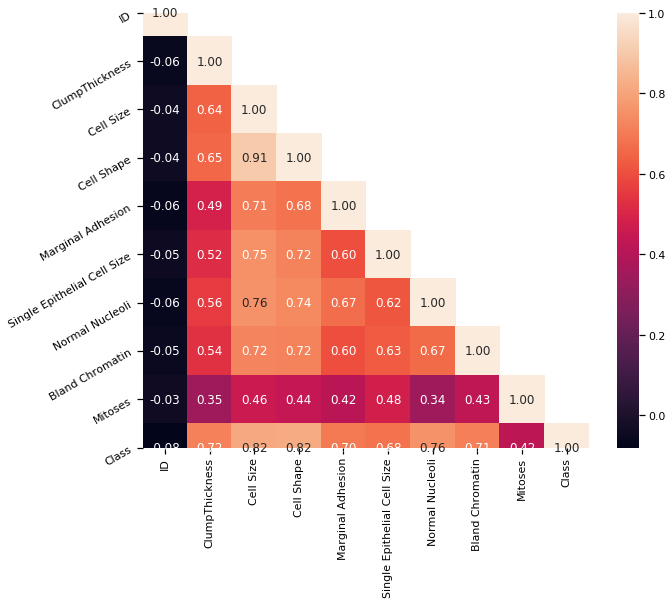

In [26]:
# Check for correlation of variable

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,8))
# create a mask so we only see the correlation values once
mask = np.zeros_like(candf.corr())
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(candf.corr(),mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)


We can observe that cell size and cell shape are highly correlated with each other.Cell size is moderately correlated with marginal adhesion. Cell size , Cell shape , Marginal Adhesion, normal nucleoli , bland chromatin are correlated with target variable. Normal Nuclieoli , Single Epithelial cell size are correlated with Cell size and cell shape. We could find the multicolinearity between independent variables. These noise can be reduced using PCA for higher accuracy

In [25]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1080x1080 with 0 Axes>

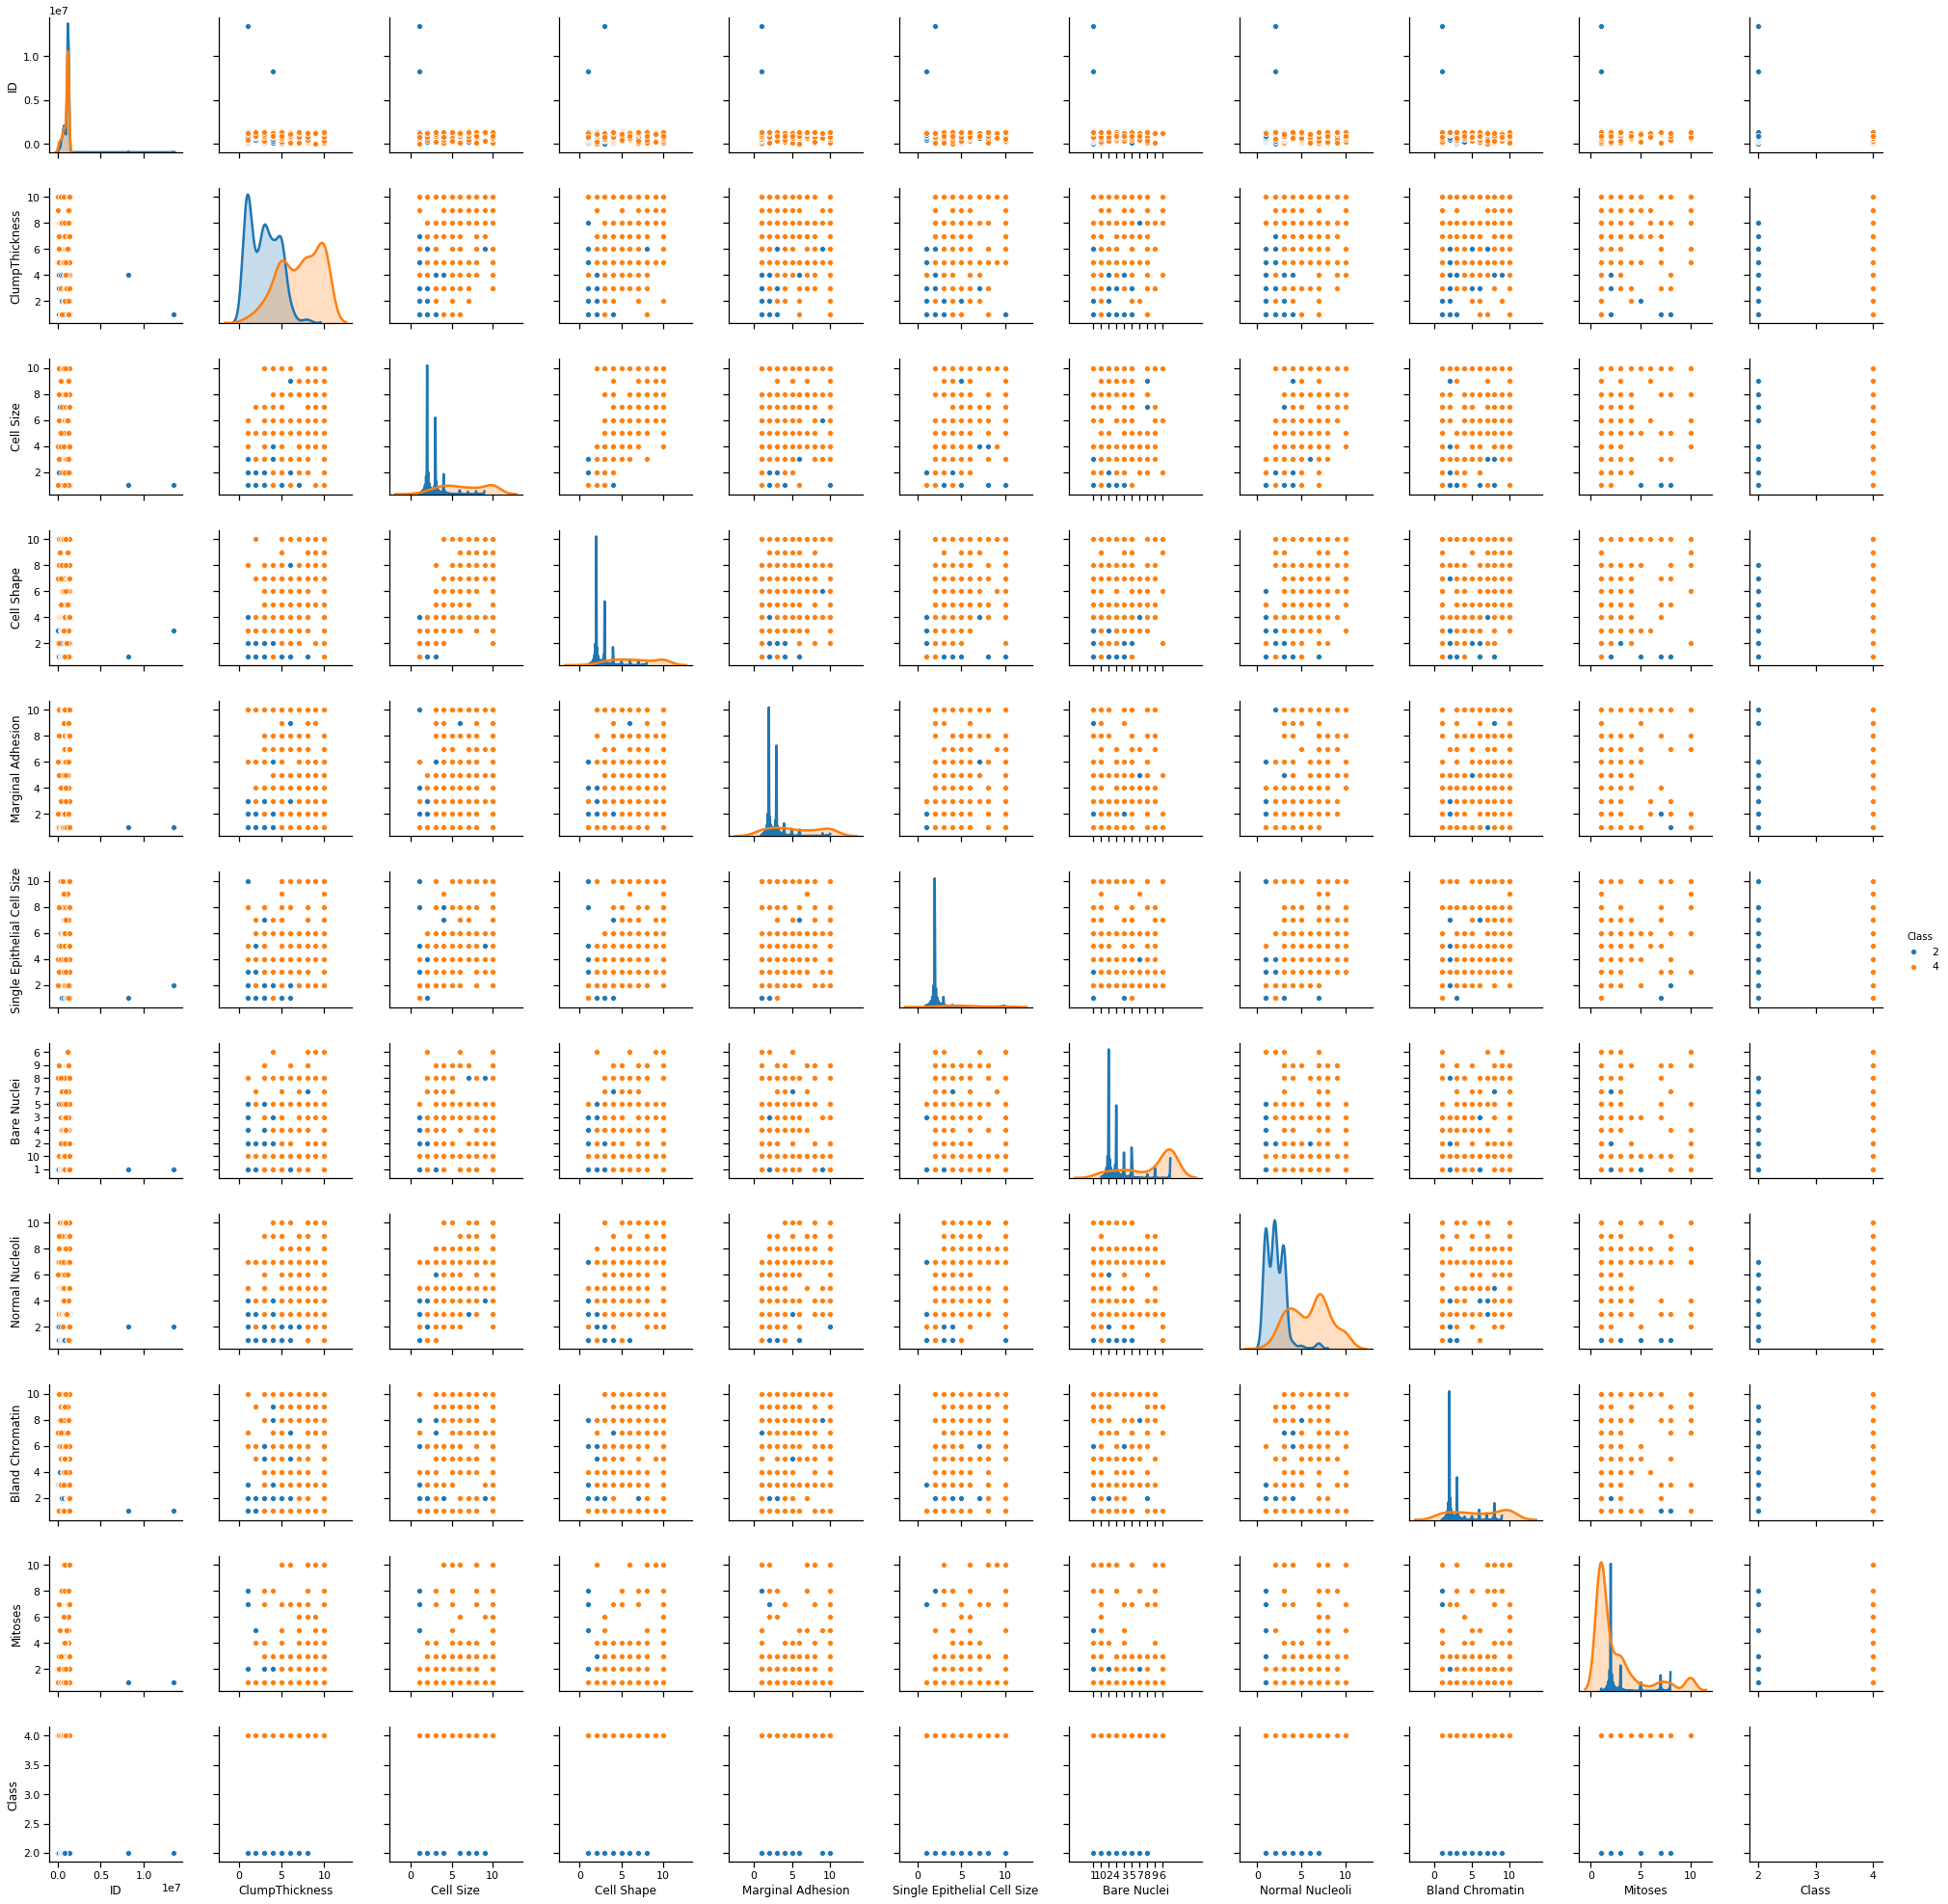

In [26]:
#Let us check for pair plots
plt.figure(figsize = (15, 15))
sns.pairplot(candf,hue ='Class')

In [27]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [101]:
# We could see most of the outliers are now removed.
candf.drop(['ID','Class'] , axis = 1 , inplace = True)

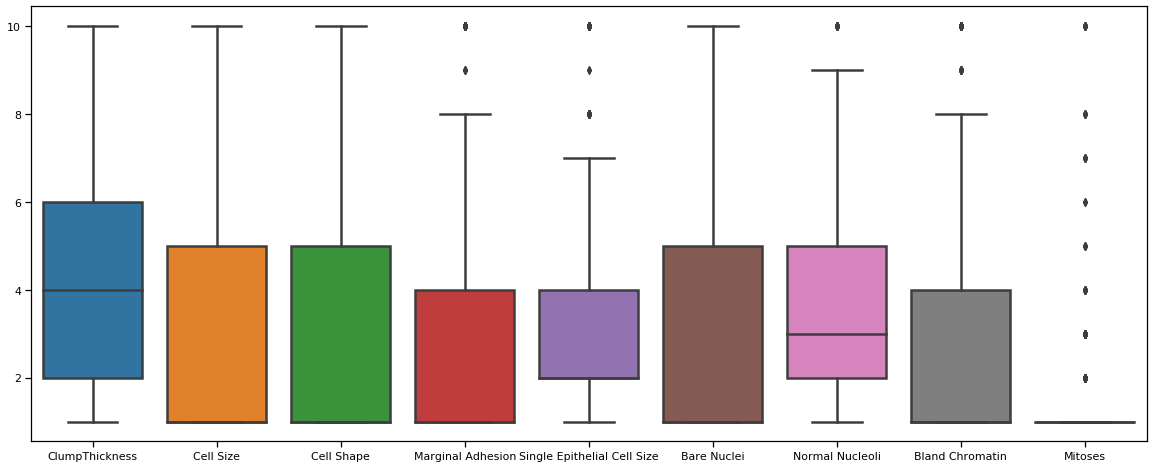

In [102]:
#find outliers in the data using box plot
plt.figure( figsize = (20,8))
sns.boxplot(data = candf)


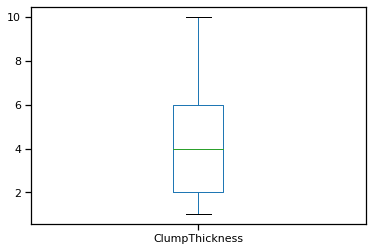

In [103]:
candf['ClumpThickness'].plot(kind = 'box')

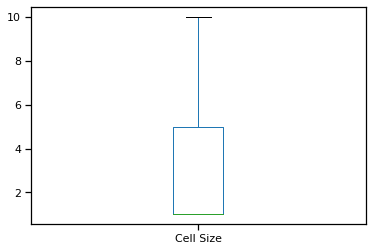

In [104]:
candf['Cell Size'].plot(kind = 'box')

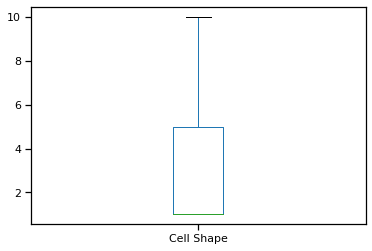

In [105]:
candf['Cell Shape'].plot(kind = 'box')

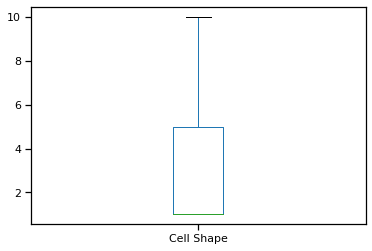

In [106]:
candf['Cell Shape'].plot(kind = 'box')

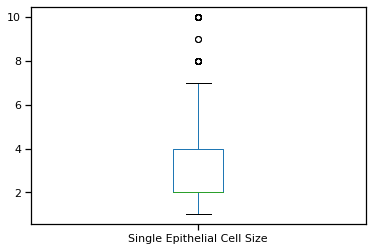

In [107]:
candf['Single Epithelial Cell Size'].plot(kind = 'box')

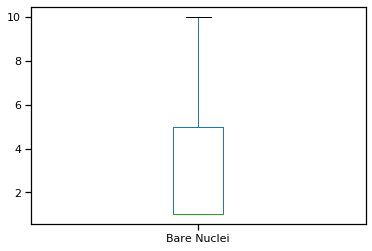

In [108]:
candf['Bare Nuclei'] = candf['Bare Nuclei'].astype("int")

candf.dtypes
candf['Bare Nuclei'].plot(kind = 'box')

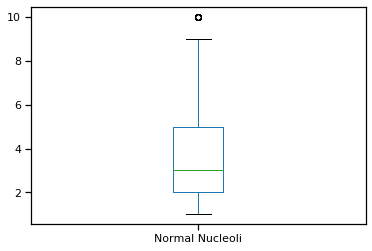

In [109]:
candf['Normal Nucleoli'].plot(kind = 'box')

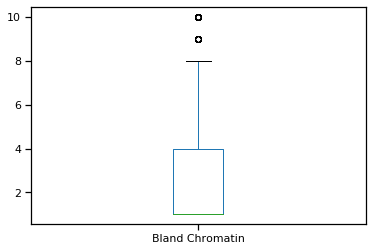

In [110]:
candf['Bland Chromatin'].plot(kind = 'box')

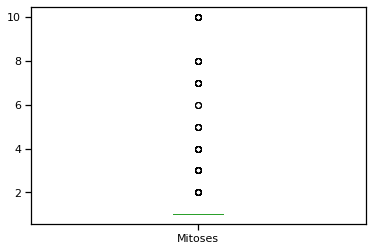

In [111]:
candf['Mitoses'].plot(kind = 'box')

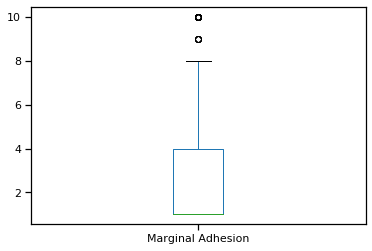

In [112]:
candf['Marginal Adhesion'].plot(kind = 'box')

There are outliers in Marginal Adheshion single , Single Epithelial cell size , Normal Nucleoli , Bland Chromatin and Mitoses columns. Those missing values should be dropped to get clean data

In [113]:
# to standardise the data
candf.dtypes

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
dtype: object

In [114]:
#Marginal Adheshion single , Single Epithelial cell size , Normal Nucleoli , Bland Chromatin and Mitoses
#features = ['Cell Size','Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Normal Nucleoli','Bland Chromatin','Mitoses']

#candf['Bare Nuclei'] = candf['Bare Nuclei'].astype("int")

In [115]:
candf.dtypes

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
dtype: object

In [134]:
Q1 = candf.quantile(0.25)
Q3 = candf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#print(candf < (Q1 - 1.5 * IQR)) |(candf > (Q3 + 1.5 * IQR))
((candf < (Q1 - 1.5 * IQR)) | (candf > (Q3 + 1.5 * IQR))).sum()


ClumpThickness                 4.0
Cell Size                      4.0
Cell Shape                     4.0
Marginal Adhesion              3.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    4.0
Normal Nucleoli                3.0
Bland Chromatin                3.0
Mitoses                        0.0
dtype: float64


ClumpThickness                   0
Cell Size                        0
Cell Shape                       0
Marginal Adhesion               60
Single Epithelial Cell Size     54
Bare Nuclei                      0
Normal Nucleoli                 20
Bland Chromatin                 77
Mitoses                        120
dtype: int64

In [303]:
MqM1 = np.quantile(candf['Marginal Adhesion'], 0.25)
MqM3 = np.quantile(candf['Marginal Adhesion'], 0.75)
iqrM = MqM3-MqM1
MlowM  = MqM1-1.5*iqrM
MhighM = MqM3+1.5*iqrM
print(MlowM)
print(MhighM)


-3.5
8.5


In [304]:
MqS1 = np.quantile(candf['Single Epithelial Cell Size'], 0.25)
MqS3 = np.quantile(candf['Single Epithelial Cell Size'], 0.75)
iqrS = MqS3-MqS1
MlowS  = MqS1-1.5*iqrS
MhighS = MqS3+1.5*iqrS
print(MlowS)
print(MhighS)

-1.0
7.0


In [161]:
MqN1 = np.quantile(candf['Normal Nucleoli'], 0.25)
MqN3 = np.quantile(candf['Normal Nucleoli'], 0.75)
iqrN = MqN3-MqN1
MlowN  = MqN1-1.5*iqrN
MhighN = MqN3+1.5*iqrN
print(MlowN)
print(MhighN)

-2.5
9.5


In [162]:
MqB1 = np.quantile(candf['Bland Chromatin'], 0.25)
MqB3 = np.quantile(candf['Bland Chromatin'], 0.75)
iqrB = MqB3-MqB1
MlowB  = MqB1-1.5*iqrB
MhighB = MqB3+1.5*iqrB
print(MlowB)
print(MhighB)

-3.5
8.5


In [163]:
MqT1 = np.quantile(candf['Mitoses'], 0.25)
MqT3 = np.quantile(candf['Mitoses'], 0.75)
print(MqT1)
print(MqT3)
iqrT = MqT3-MqT1
MlowT  = MqT1-1.5*iqrT
MhighT = MqT3+1.5*iqrT
print(MlowT)
print(MhighT)

1.0
1.0
1.0
1.0


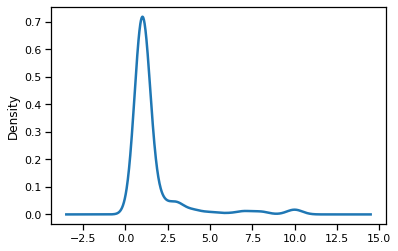

In [164]:
candf['Mitoses'].plot(kind= 'kde')

In [305]:
#one way of removing outliers from dataframe
df_out = candf[~((candf < (Q1 - 1.5 * IQR)) |(candf > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)
df_out.head(10)

(504, 9)


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
9,4,2,1,1,2,1,2,1,1
10,1,1,1,1,1,1,3,1,1


In [306]:
#features = list(candf.columns)
#dfout = []
#print(list(candf.columns))
#def remove_outliers(df,col_name):
    #print('first',col_name)aa
 #   Mq1 = np.quantile(candf[col_name], 0.25)
  #  Mq3 = np.quantile(candf[col_name], 0.75)
   # iqr = Mq3-Mq1 #Interquartile range
    #Mlow  = Mq1-1.5*iqr
    #Mhigh = Mq3+1.5*iqr
    #print(Mlow)
    #print(Mhigh)
   
        #dfout = candf[col_name].loc[(candf[col_name] > Mlow) & (candf[col_name] < Mhigh)]
    #dfout = candf.loc[(candf[col_name] > Mlow) & (candf[col_name] < Mhigh)]
        
    #print(dfout)
    #return df_out
#for i in range(len(features)):
 #    remove_outliers(candf,features[i])

#dfout

2nd way of removing outliers above 3 sigma level from dataframe.

In [307]:

candf_o = candf[(np.abs(zscore(candf)) < 3).all(axis = 1)]
print(candf_o.shape)
candf_o.head(10)

(648, 9)


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


Outliers can be replaced with 3 sigma values. But for our problem as it mentioned to remove outliers, we have removed it. After outliers removal standardising the data

In [308]:
candf_z = candf_o.apply(zscore)

In [309]:
candf_z.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.304858,-0.642393,-0.693006,-0.588706,-0.509392,-0.632961,-0.099106,-0.564430,-0.331993
1,0.304858,0.440705,0.420386,0.940278,2.569766,1.959335,-0.099106,-0.214429,-0.331993
2,-0.439202,-0.642393,-0.693006,-0.588706,-0.509392,-0.344928,-0.099106,-0.564430,-0.331993
3,0.676887,1.884835,1.904908,-0.588706,0.106440,0.231138,-0.099106,1.535574,-0.331993
4,-0.067172,-0.642393,-0.693006,0.175786,-0.509392,-0.632961,-0.099106,-0.564430,-0.331993
5,1.420947,2.606900,2.647169,2.087015,2.569766,1.959335,2.540106,1.535574,-0.331993
6,-1.183261,-0.642393,-0.693006,-0.588706,-0.509392,1.959335,-0.099106,-0.564430,-0.331993
7,-0.811231,-0.642393,-0.321876,-0.588706,-0.509392,-0.632961,-0.099106,-0.564430,-0.331993
8,-0.811231,-0.642393,-0.693006,-0.588706,-0.509392,-0.632961,-0.978844,-0.564430,4.947314
9,-0.067172,-0.281360,-0.693006,-0.588706,-0.509392,-0.632961,-0.538975,-0.564430,-0.331993


In [310]:
candf_z.shape

(648, 9)

In [237]:
#from scipy.stats import zscore
#candf_z = candf.apply(zscore)
#candf_z = candf_z[(np.abs(zscore(candf_z)) < 3).all(axis = 1)]
#candf_z.shape

In [238]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(candf_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.0015456  0.61818427 0.62410239 0.47976788 0.4926424  0.57650829
  0.54825598 0.51849178 0.36470893]
 [0.61818427 1.0015456  0.90086598 0.69283943 0.73308212 0.67637148
  0.74671627 0.73094613 0.43155367]
 [0.62410239 0.90086598 1.0015456  0.67104351 0.70690496 0.68962935
  0.73080354 0.72309852 0.38961603]
 [0.47976788 0.69283943 0.67104351 1.0015456  0.59795509 0.68575821
  0.6510195  0.59378187 0.38750453]
 [0.4926424  0.73308212 0.70690496 0.59795509 1.0015456  0.59413265
  0.62686014 0.66848411 0.40724077]
 [0.57650829 0.67637148 0.68962935 0.68575821 0.59413265 1.0015456
  0.65916743 0.56133266 0.41411613]
 [0.54825598 0.74671627 0.73080354 0.6510195  0.62686014 0.65916743
  1.0015456  0.66758427 0.32865685]
 [0.51849178 0.73094613 0.72309852 0.59378187 0.66848411 0.56133266
  0.66758427 1.0015456  0.39706679]
 [0.36470893 0.43155367 0.38961603 0.38750453 0.40724077 0.41411613
  0.32865685 0.39706679 1.0015456 ]]


In [239]:
cov_matrix.shape

(9, 9)

# Q7 Identify eigen values and eigen vector

In [240]:
# Step 2- Get eigen values and eigen vector

In [241]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %eigenvalues)
print('\nEigenvalues \n%s' %eigenvectors)

Eigenvectors 
[5.82203615 0.76965166 0.56855275 0.51564015 0.09661838 0.35306537
 0.27645783 0.31166042 0.30022764]

Eigenvalues 
[[-0.2984365   0.04553224  0.84403487 -0.28511636 -0.00398401  0.06750236
  -0.20352908 -0.2349328   0.11826378]
 [-0.38042723 -0.10319707 -0.06832919 -0.14972004 -0.73068373  0.00822344
   0.1025499   0.06434122 -0.51857295]
 [-0.37563843 -0.15289024 -0.01034446 -0.14758352  0.67213995  0.01322309
   0.2622203   0.08570831 -0.53439693]
 [-0.33331526 -0.05242438 -0.13776831  0.60715475  0.04659558 -0.04800634
  -0.2987843  -0.62741542 -0.10553534]
 [-0.33756879 -0.02923589 -0.34940432 -0.24533188  0.04802847  0.73413446
  -0.29634573  0.0652377   0.26378887]
 [-0.33804338  0.01197799  0.21917282  0.53670357 -0.07270728  0.21374553
   0.54839392  0.31393755  0.31500726]
 [-0.34722517 -0.22947627 -0.03489352  0.09031837  0.04732239 -0.47404439
  -0.50705569  0.55088921  0.17279605]
 [-0.33982375 -0.075639   -0.28656347 -0.38628933 -0.01969863 -0.40820448
   0.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


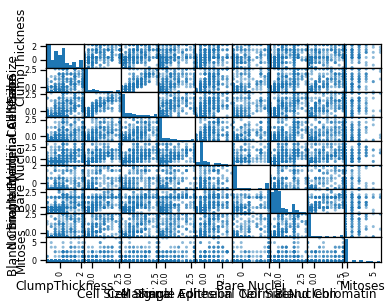

In [242]:

axes = pd.plotting.scatter_matrix(candf_z)
plt.tight_layout()

In [243]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs

[(5.822036154322855,
  array([-0.2984365 , -0.38042723, -0.37563843, -0.33331526, -0.33756879,
         -0.33804338, -0.34722517, -0.33982375, -0.22301564])),
 (0.7696516614902926,
  array([ 0.04553224, -0.10319707, -0.15289024, -0.05242438, -0.02923589,
          0.01197799, -0.22947627, -0.075639  ,  0.94961814])),
 (0.5685527494831631,
  array([ 0.84403487, -0.06832919, -0.01034446, -0.13776831, -0.34940432,
          0.21917282, -0.03489352, -0.28656347, -0.10194536])),
 (0.5156401476647321,
  array([-0.28511636, -0.14972004, -0.14758352,  0.60715475, -0.24533188,
          0.53670357,  0.09031837, -0.38628933, -0.01610837])),
 (0.0966183804927374,
  array([-0.00398401, -0.73068373,  0.67213995,  0.04659558,  0.04802847,
         -0.07270728,  0.04732239, -0.01969863,  0.04383634])),
 (0.35306536514690995,
  array([ 0.06750236,  0.00822344,  0.01322309, -0.04800634,  0.73413446,
          0.21374553, -0.47404439, -0.40820448, -0.13002616])),
 (0.27645783163469156,
  array([-0.20352

# Q8 Find variance and cumulative variance by each eigen vector

In [244]:
tot = sum(eigenvalues)
print(tot)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
print('The variance by each eigen vector is', var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance by each eigen vector is", cum_var_exp)

9.013910355486855
The variance by each eigen vector is [64.58946145142129, 8.538488082719816, 6.307503925164728, 5.720493407734601, 3.9168945687594463, 3.457549623927088, 3.3307147488044655, 3.067013324205171, 1.0718808672633942]
Cumulative Variance by each eigen vector is [ 64.58946145  73.12794953  79.43545346  85.15594687  89.07284144
  92.53039106  95.86110581  98.92811913 100.        ]


From the above we can infer that the values in the range of 1 sigma can be dropped. That is range of 98% to 96 %

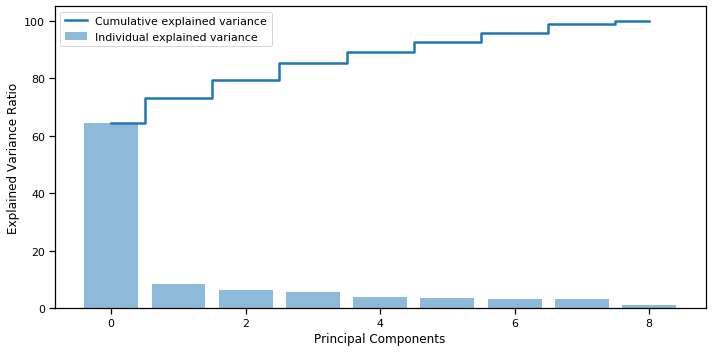

In [245]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [246]:
from sklearn.decomposition import PCA

In [247]:
pca = PCA(n_components=7)

In [248]:
pca.fit(candf_z)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [249]:
x_reduced = pca.transform(candf_z)

In [250]:
x_reduced.shape
# there is reduction in dimensionality after PCA from 9 to 7

(648, 7)

# Q10 Find correlation between components and features

In [251]:
pca.components_


array([[ 0.2984365 ,  0.38042723,  0.37563843,  0.33331526,  0.33756879,
         0.33804338,  0.34722517,  0.33982375,  0.22301564],
       [ 0.04553224, -0.10319707, -0.15289024, -0.05242438, -0.02923589,
         0.01197799, -0.22947627, -0.075639  ,  0.94961814],
       [-0.84403487,  0.06832919,  0.01034446,  0.13776831,  0.34940432,
        -0.21917282,  0.03489352,  0.28656347,  0.10194536],
       [ 0.28511636,  0.14972004,  0.14758352, -0.60715475,  0.24533188,
        -0.53670357, -0.09031837,  0.38628933,  0.01610837],
       [ 0.06750236,  0.00822344,  0.01322309, -0.04800634,  0.73413446,
         0.21374553, -0.47404439, -0.40820448, -0.13002616],
       [-0.2349328 ,  0.06434122,  0.08570831, -0.62741542,  0.0652377 ,
         0.31393755,  0.55088921, -0.35107458,  0.10062672],
       [-0.11826378,  0.51857295,  0.53439693,  0.10553534, -0.26378887,
        -0.31500726, -0.17279605, -0.4654861 ,  0.0709088 ]])

In [252]:
print(pca.explained_variance_)

[5.82203615 0.76965166 0.56855275 0.51564015 0.35306537 0.31166042
 0.30022764]


In [253]:
pd.DataFrame(pca.components_,columns = candf_z.columns)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.298436,0.380427,0.375638,0.333315,0.337569,0.338043,0.347225,0.339824,0.223016
1,0.045532,-0.103197,-0.152890,-0.052424,-0.029236,0.011978,-0.229476,-0.075639,0.949618
2,-0.844035,0.068329,0.010344,0.137768,0.349404,-0.219173,0.034894,0.286563,0.101945
3,0.285116,0.149720,0.147584,-0.607155,0.245332,-0.536704,-0.090318,0.386289,0.016108
4,0.067502,0.008223,0.013223,-0.048006,0.734134,0.213746,-0.474044,-0.408204,-0.130026
5,-0.234933,0.064341,0.085708,-0.627415,0.065238,0.313938,0.550889,-0.351075,0.100627
6,-0.118264,0.518573,0.534397,0.105535,-0.263789,-0.315007,-0.172796,-0.465486,0.070909


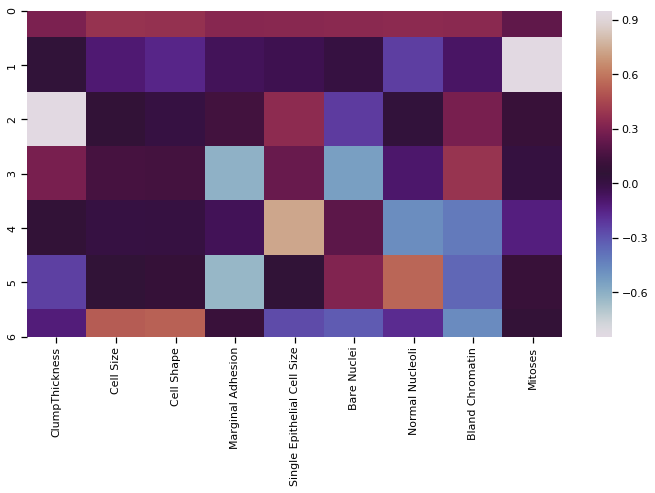

In [254]:
map= pd.DataFrame(pca.components_,columns = candf_z.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

Visual representation of relation between PCA components and original features

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [80]:
moviesdf = pd.read_csv('movies_metadata.csv')

In [81]:
moviesdf.head(50)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [82]:
moviesdf.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

In [83]:
moviesdf['overview'].shape

(45466,)

In [84]:
moviesdf['tagline'].shape

(45466,)

In [85]:
moviesdf['tagline'].unique()

array([nan, 'Roll the dice and unleash the excitement!',
       'Still Yelling. Still Fighting. Still Ready for Love.', ...,
       'Do you know what happened 50 years before "The Blair Witch Project"?',
       'Rising and falling between a man and woman',
       'A deadly game of wits.'], dtype=object)

In [86]:
moviesdf['overview'].unique()

array(["Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",
       "When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",
       "A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in

In [87]:
moviesdf['description'] = moviesdf['overview'].str.cat(moviesdf['tagline'])

In [88]:
moviesdf.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
description               object
dtype: object

In [89]:
moviesdf['description'].unique()

array([nan,
       "When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.Roll the dice and unleash the excitement!",
       "A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.Still Yelling. Still Fighting. Still Ready for Love.",
       ...,
       'A film archivist revisits the story of Rustin Parr, a hermit thought to have murdered seven children while under the possession of 

In [90]:
moviesdf.head(100)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,NaN
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,When siblings Judy and Peter discover an encha...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,A family wedding reignites the ancient feud be...
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Just when George Banks has recovered from his ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,NaN,3000000,"[{'id': 18, 'name': 'Drama'}]",NaN,406,tt0113247,fr,La Haine,Aimlessly whiling away their days in the concr...,...,0.0,98.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Young Friends... One Last Chance.,La Haine,False,7.9,695.0,Aimlessly whiling away their days in the concr...
96,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45549,tt0111173,en,Shopping,"A dark, hip, urban story of a barren and anony...",...,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one leaves without paying...,Shopping,False,5.6,13.0,"A dark, hip, urban story of a barren and anony..."
97,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.nickbroomfield.com/heidifleiss.html,63076,tt0113283,en,Heidi Fleiss: Hollywood Madam,A documentary crew from the BBC arrives in L.A...,...,0.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Heidi Fleiss: Hollywood Madam,False,6.8,4.0,A documentary crew from the BBC arrives in L.A...
98,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,11062,tt0115907,en,City Hall,The accidental shooting of a boy in New York l...,...,0.0,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It started with a shootout on a rainswept stre...,City Hall,False,6.0,67.0,The accidental shooting of a boy in New York l...


# Q13  Lets drop the null values in `description` column

In [91]:
moviesdf['description'].isna().sum()

25062

In [92]:
moviesdf.dropna(subset=['description'], inplace = True)

In [93]:
moviesdf['description'].isna().sum()

0

In [94]:
moviesdf['description'].unique()

array(["When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.Roll the dice and unleash the excitement!",
       "A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.Still Yelling. Still Fighting. Still Ready for Love.",
       'Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive "good man" to break a string of less-than-stellar lovers

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

In [95]:
moviesdf.shape

(20404, 25)

In [96]:
moviesdf['title'].sample(50)

30127                              1942: A Love Story
28543                               The Walking Hills
7857                                        The Clock
18472                                            W.E.
2440                            Village of the Damned
26972                                The Grissom Gang
902                             Foreign Correspondent
35802      The Rise & Fall of a White Collar Hooligan
5598                                   Faces of Death
20422                                  Days and Hours
22335                                        Fun Size
37994                                   The Dead Room
26358                                           Siren
165                                      First Knight
3724                                      Silent Fall
38589          Alvin and the Chipmunks: The Road Chip
21428                                  The Black Room
1305                         The Mirror Has Two Faces
31437    Man in the Mirror: 

In [97]:

moviesdf.drop_duplicates(subset = 'title' , keep = 'first' , inplace = True)

In [98]:
moviesdf.shape

(19437, 25)

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

In [105]:
moviesdf.tail(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
19427,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 878...",NaN,36680,tt0899298,en,TechnoCalyps,Are we prepared for dealing with the prospect ...,...,0.0,156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Are we prepared for dealing with the prospect ...,TechnoCalyps,False,5.0,1.0,Are we prepared for dealing with the prospect ...
19428,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 9648, 'n...",NaN,45527,tt1331329,en,The Final Storm,A stranger named Silas flees from a devastatin...,...,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Action, Horror",The Final Storm,False,3.7,11.0,A stranger named Silas flees from a devastatin...
19429,False,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,455661,tt6969946,en,In a Heartbeat,A closeted boy runs the risk of being outed by...,...,0.0,4.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Heart Wants What The Heart Wants,In a Heartbeat,False,8.3,146.0,A closeted boy runs the risk of being outed by...
19430,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,327237,tt3814486,nl,"Bloed, Zweet en Tranen","Bloed, Zweet en Tranen (Blood, Sweat and Tears...",...,0.0,111.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",Released,The movie about Andre Hazes,"Blood, Sweat and Tears",False,6.8,11.0,"Bloed, Zweet en Tranen (Blood, Sweat and Tears..."
19431,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",NaN,84710,tt0036975,en,Jungle Woman,Paula the ape woman (Acquanetta) is alive and ...,...,0.0,61.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,RAPTUROUS BEAUTY!...FURY OF A BEAST!,Jungle Woman,False,5.8,2.0,Paula the ape woman (Acquanetta) is alive and ...
19432,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,14008,tt0294425,en,Cadet Kelly,Hyperactive teenager Kelly is enrolled into a ...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Too Cool For The Rules!,Cadet Kelly,False,5.2,145.0,Hyperactive teenager Kelly is enrolled into a ...
19433,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,14885,tt0457437,en,Pooh's Heffalump Halloween Movie,"It's Halloween in the 100 Acre Wood, and Roo's...",...,0.0,67.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Celebrate Lumpy's First Halloween.,Pooh's Heffalump Halloween Movie,False,5.4,7.0,"It's Halloween in the 100 Acre Wood, and Roo's..."
19434,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,84419,tt0038621,en,House of Horrors,An unsuccessful sculptor saves a madman named ...,...,0.0,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Meet...The CREEPER!,House of Horrors,False,6.3,8.0,An unsuccessful sculptor saves a madman named ...
19435,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,289923,tt0252966,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,...,0.0,30.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Do you know what happened 50 years before ""The...",The Burkittsville 7,False,7.0,1.0,A film archivist revisits the story of Rustin ...
19436,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,Rising and falling between a man and woman.Ris...


In [103]:
moviesdf = moviesdf.reset_index(drop = True)
moviesdf.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
0,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,When siblings Judy and Peter discover an encha...
1,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,A family wedding reignites the ancient feud be...
2,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Just when George Banks has recovered from his ...
4,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"Obsessive master thief, Neil McCauley leads a ..."
5,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,An ugly duckling having undergone a remarkable...
6,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,"A mischievous young boy, Tom Sawyer, witnesses..."
7,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,International action superstar Jean Claude Van...
8,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,James Bond must unmask the mysterious head of ...
9,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",...,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0,"Widowed U.S. president Andrew Shepherd, one of..."


# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tf_idf = TfidfVectorizer(analyzer= 'word', ngram_range=(1, 3), min_df=0, stop_words='english')

tf_idf_matrix = tf_idf.fit_transform(moviesdf['description'])

tf_idf_matrix

<19437x1149506 sparse matrix of type '<class 'numpy.float64'>'
	with 1820387 stored elements in Compressed Sparse Row format>

# Q17  Create cosine similarity matrix

In [193]:
cosine_similarity = cosine_similarity(tf_idf_matrix,tf_idf_matrix)

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

In [194]:
title = moviesdf['title']
indices = pd.Series(moviesdf.index, index=moviesdf['title'])

def recommend(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

In [190]:
recommend('The Godfather')

864                    The Godfather: Part II
15874                        Honor Thy Father
12008                              The Family
12608                              Blood Ties
3228                                     Made
4000                       Johnny Dangerously
26                             Shanghai Triad
18496                           Live by Night
5899                                     Fury
18911                  In Memory of My Father
1445                  The Godfather: Part III
9838                    New York Confidential
16711                         Life Inside Out
4827                                 Mobsters
4033                                  8 Women
8436                             I Am the Law
16880                 The Condemned of Altona
1994                         The Color Purple
17787                        Peter Rottentail
1962                            Summer of Sam
14700                           Run All Night
4174                      The Youn

In [195]:
recommend('The Dark Knight Rises')

8087                             The Dark Knight
112                               Batman Forever
986                               Batman Returns
2330                Batman: Mask of the Phantasm
451                                       Batman
11899            Batman: Mystery of the Batwoman
9476                  Batman: Under the Red Hood
6369          Batman Beyond: Return of the Joker
13487                          Batman vs Dracula
10503                           Batman: Year One
7681                                   Slow Burn
11406    Batman: The Dark Knight Returns, Part 2
17003                          Batman: Bad Blood
6796                               Batman Begins
15917           Batman Unlimited: Monster Mayhem
18606                      The Lego Batman Movie
11248    Batman: The Dark Knight Returns, Part 1
15074         Batman Unlimited: Animal Instincts
1009                    Night Falls on Manhattan
1683               The Pope of Greenwich Village
4394                

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [277]:
jokes = pd.read_csv('jokes.csv')
jokes.shape
##loaded jokes.csv and printed shape of it

#there are 24983 rows and 101 columsn

(24983, 101)

In [278]:
#printing first 10 rows
jokes.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [279]:
ratings = jokes.iloc[0:200,1:]
ratings.shape

(200, 100)

In [280]:
ratings.head(10)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q22 Change the column indices from 0 to 99

In [281]:
#changing the indices from 0 to 99
ratings.columns = np.arange(0,100)

In [282]:
#printing to verify columns
ratings.shape
ratings.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [283]:
#checking for null
ratings.isnull().sum().sum()

0

In [284]:
ratings.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
95    float64
96    float64
97    float64
98    float64
99    float64
Length: 100, dtype: object

In [286]:
#replacing null 99 with 0
ratings.replace(99 , 0, inplace=True)

In [287]:
ratings.sample(40)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
95,0.44,-8.45,-0.53,-3.88,-8.06,-5.10,-8.35,3.06,3.79,-9.13,...,0.00,0.00,6.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00
107,-2.18,-4.56,-2.48,0.00,-1.41,0.29,-0.87,-4.76,0.00,-2.91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
172,0.00,0.00,0.00,0.00,4.37,0.00,-3.40,1.12,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,5.05,0.00,0.00,0.00,0.00
104,-0.92,-7.82,0.00,0.00,-9.13,0.00,3.16,-3.64,0.00,-8.35,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
124,0.00,0.00,0.00,0.00,-3.59,0.00,-9.95,-9.66,0.00,4.27,...,0.00,0.00,0.00,0.00,-2.18,0.00,0.00,0.00,0.00,0.00
155,1.99,6.07,8.25,-2.38,9.22,5.39,-0.49,-7.86,-4.13,-1.55,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
65,0.00,0.00,0.00,0.00,-3.06,8.98,9.13,-9.17,0.00,5.49,...,0.00,0.00,0.00,0.00,4.56,8.54,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
142,-9.03,-0.19,0.00,0.00,-2.72,0.00,-9.42,2.67,0.00,-0.53,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.98,0.00
174,0.00,0.00,0.00,0.00,-4.32,0.00,3.45,4.37,0.00,5.73,...,0.00,0.00,0.00,0.00,7.14,0.00,0.00,0.00,0.00,0.00


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [288]:
#standardising the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ratings_diff = sc.fit_transform(ratings)
#scaled value is 
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [289]:
#convert ratings_Diff array to panda

rating_diff_Df = pd.DataFrame(ratings_diff)
rating_diff_Df.shape

(200, 100)

In [290]:
#checking the data after standardising
rating_diff_Df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
5,-1.490063,-0.843136,0.045369,-2.023513,-1.301062,-1.286999,-1.578608,-0.161811,-1.655217,-0.539640,...,-1.403455,-2.232467,-0.575275,-1.038043,-0.835272,-1.266839,-0.217896,-2.629557,-1.591755,-1.219861
6,-0.117881,-0.121130,-0.053284,0.181880,1.591786,-2.548886,1.344707,1.830154,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,0.643062,-0.233349,-0.026858,-0.041444,-0.160954
7,1.403307,0.523373,2.002748,-1.429354,-1.498469,-0.689143,1.620828,0.308342,-1.292726,-1.064321,...,2.280845,-0.409232,-0.393528,-1.822800,-1.131677,-1.266839,0.428065,-0.041190,0.360716,-0.160954
8,-0.960761,-0.843136,-2.165370,-1.605786,-1.605475,-0.367396,-0.972924,-1.823844,-1.955637,-0.499588,...,1.302470,-0.146965,0.944503,-0.267712,-0.263634,-0.237914,-0.322980,-0.109984,-1.085217,-1.680255
9,0.551531,0.929247,1.101412,0.962849,1.189591,0.873954,1.560259,0.537233,0.743180,1.454948,...,-0.192459,1.357125,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


The top 10 ratings are

In [292]:
#find mean for each column
meandf = pd.DataFrame(rating_diff_Df.mean(),columns=['Mean'])
#mean for each column is
meandf

,Mean
0,-1.110223e-17
1,-9.658940e-17
2,-4.107825e-17
3,3.719247e-17
4,-8.881784e-18
...,...
95,2.858824e-17
96,-2.137179e-17
97,1.198694e-16
98,1.840889e-16


In [294]:
#The maximum mean is
meandf.max()
#the highest mean is

Mean    1.840889e-16
dtype: float64

In [295]:
print('The joke id with the highest means is',meandf.idxmax())

The joke id with the highest means is Mean    98
dtype: int64


In [296]:
#Displaying top 10 joke ids

In [297]:
top = meandf.sort_values(by = 'Mean' , ascending = False).head(10)

In [298]:
print('The top 10 joke ids are')
for row in top.index: 
    print(row, end = " ") 

The top 10 joke ids are
98 81 97 20 94 92 47 73 99 49 